# Chapter 21 exercise solutions

5. An earlier chapter demonstrated that some functions can be expressed as an infinite sum of polynomials (i.e., the Taylor series). Other functions, particularly periodic functions, can be written as an infinite sum of sine and cosine waves. For these functions,

$$
f(x) = \frac{A_0}{2} + \sum_{n=1}^{\infty} A_n \cos(nx) + B_n \sin(nx).
$$

It can be shown that the values of $A_n$ and $B_n$ can be computed using the following formulas:

$$
A_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos(nx) \,dx,
$$

$$
B_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin(nx) \,dx.
$$

Just like the Taylor series, functions can be approximated by truncating the Fourier series at some n = N. Fourier series can be used to approximate some particularly nasty functions, such as the step function, and they form the basis of many engineering applications, such as signal processing. 

Write a function `my_fourier_coef(f,n)` with output `[$A_n,B_n$]`, where `f` is a function object that is $2\pi$ -periodic. The function `my_fourier_coef` should compute the nth Fourier coefficients, $A_n$ and $B_n$, in the Fourier series for f defined by the two formulas given earlier. Use the `quad` function to perform the integration.


In [3]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

def my_fourier_coef(f, n):
    An, _ = spi.quad(lambda x: f(x) * np.cos(n*x), -np.pi, np.pi)
    Bn, _ = spi.quad(lambda x: f(x) * np.sin(n*x), -np.pi, np.pi)
    return An / np.pi, Bn / np.pi

def plot_results(f, N):
    x = np.linspace(-np.pi, np.pi, 10000)
    [A0, _] = my_fourier_coef(f, 0)
    y = A0 * np.ones(len(x)) / 2
    
    for n in range(1, N + 1):
        [An, Bn] = my_fourier_coef(f, n)
        y += An * np.cos(n*x) + Bn * np.sin(n*x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, f(x), label="analytic")
    plt.plot(x, y, label="approximate")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.legend()
    plt.title(f"{N}th Order Fourier Approximation")
    plt.show()

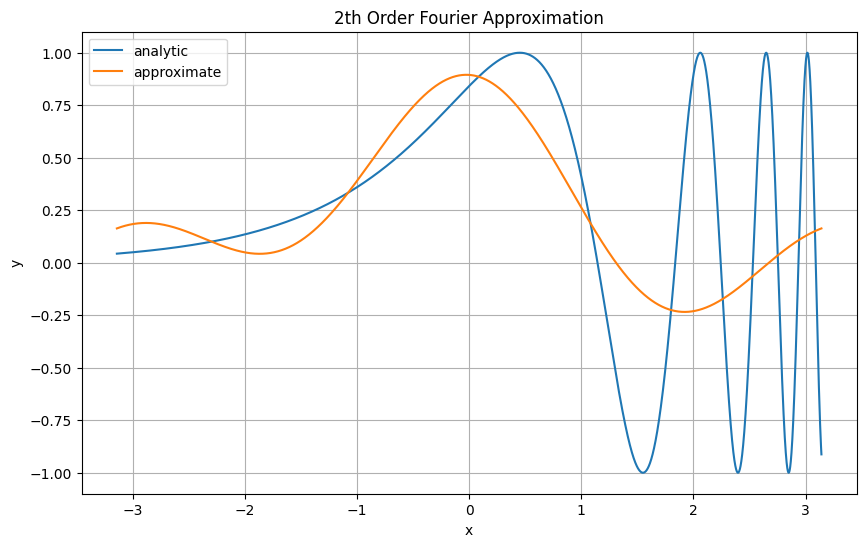

In [4]:
f = lambda x: np.sin(np.exp(x))
N = 2
plot_results(f, N)